In [11]:
import os 
import numpy as np
import cv2

from matplotlib import pyplot as plt

In [3]:
path2image = "croptest.jpg"

In [42]:
# just how it works for one image
image = cv2.imread(path2image)
# print(image.shape)
chans = cv2.split(image)
colors = ("B", "G", "R")

hist_list = []
for chan, color in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    hist_list.append(hist)

In [43]:
hist_list[0]

array([[2.731e+03],
       [1.759e+03],
       [3.045e+03],
       [4.630e+03],
       [5.234e+03],
       [7.980e+02],
       [3.420e+02],
       [3.320e+02],
       [3.510e+02],
       [3.170e+02],
       [4.580e+02],
       [4.780e+02],
       [7.290e+02],
       [7.850e+02],
       [7.810e+02],
       [8.000e+02],
       [7.900e+02],
       [5.240e+02],
       [3.950e+02],
       [3.640e+02],
       [3.480e+02],
       [3.720e+02],
       [3.880e+02],
       [3.950e+02],
       [4.230e+02],
       [3.810e+02],
       [4.740e+02],
       [4.870e+02],
       [5.120e+02],
       [5.670e+02],
       [6.030e+02],
       [6.610e+02],
       [6.920e+02],
       [8.470e+02],
       [8.540e+02],
       [8.910e+02],
       [9.780e+02],
       [1.071e+03],
       [1.183e+03],
       [1.305e+03],
       [1.332e+03],
       [1.392e+03],
       [1.482e+03],
       [1.588e+03],
       [1.669e+03],
       [1.819e+03],
       [1.810e+03],
       [1.795e+03],
       [1.898e+03],
       [1.955e+03],


In [61]:
len(hist_list[0])

256

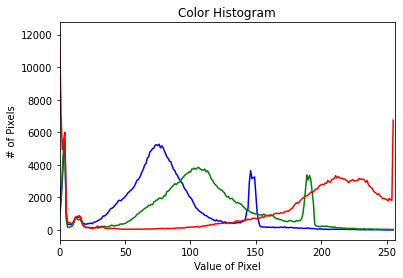

In [44]:
plt.plot(hist_list[0], color="blue")
plt.plot(hist_list[1], color="green")
plt.plot(hist_list[2], color="red")
plt.title("Color Histogram")
plt.xlabel("Value of Pixel")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])
plt.show()

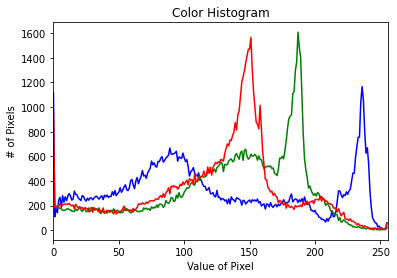

In [46]:
# easy sample color histogram
path2test = "./images/images/sample_test.jpg"
image = cv2.imread(path2test)
# print(image.shape)
chans = cv2.split(image)
colors = ("B", "G", "R")

hist_list = []
for chan, color in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    hist_list.append(hist)
plt.plot(hist_list[0], color="blue")
plt.plot(hist_list[1], color="green")
plt.plot(hist_list[2], color="red")
plt.title("Color Histogram")
plt.xlabel("Value of Pixel")
plt.ylabel("# of Pixels")
plt.xlim([0, 256])
plt.show()

In [47]:
## get average number of pixels for each value of pixel on test_images and train_validation images set
path2test = "./segmented-images/test_images/"
path2train_validation = "./train_validation_images/"

In [91]:
colors = ("B", "G", "R")

lists_three_channels_per_image = []
for file in os.listdir(path2test):
    image = cv2.imread(path2test+file)
    resized = cv2.resize(image, (530, 570), interpolation=cv2.INTER_AREA)
    chans = cv2.split(resized)
    
    three_channels_per_image = []
    for chan, color in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0,256])
        three_channels_per_image.append(hist)
    lists_three_channels_per_image.append(three_channels_per_image)

In [54]:
len(lists_three_channels_per_image)

1000

In [56]:
lists_three_channels_per_image = np.array(lists_three_channels_per_image)

In [57]:
sample = lists_three_channels_per_image[:3]

In [78]:
sample1 = sample[0]
sample2 = sample[1]
sample3 = sample[2]

In [80]:
blue1 = sample1[0]
blue2 = sample2[0]
blue3 = sample3[0]

In [84]:
(blue1[0]+blue2[0]+blue3[0])/3

array([40977.332], dtype=float32)

3
[42764.246]


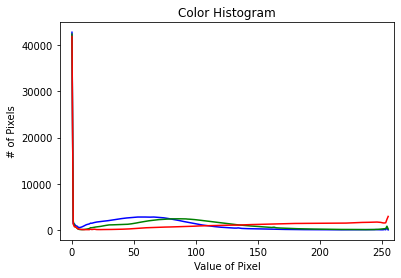

In [92]:
axis0 = np.mean(lists_three_channels_per_image, axis=0)
print(len(axis0))
blue = axis0[0]
print(blue[0])
green = axis0[1]
red = axis0[2]

plt.plot(blue, color="blue")
plt.plot(green, color="green")
plt.plot(red, color="red")
plt.title("Color Histogram")
plt.xlabel("Value of Pixel")
plt.ylabel("# of Pixels")
plt.xlim([-10, 260])
# plt.show()

plt.savefig('color_histogram_test.png')

3
[9930.957]


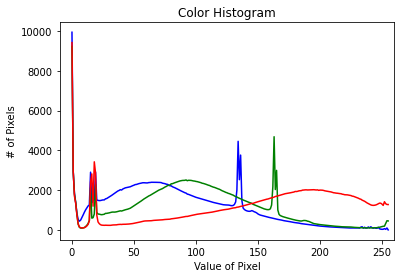

In [93]:
## on train_validation 
lists_three_channels_per_image = []
for file in os.listdir(path2train_validation):
    image = cv2.imread(path2train_validation+file)
    resized = cv2.resize(image, (530, 570), interpolation=cv2.INTER_AREA)
    chans = cv2.split(resized)
    
    three_channels_per_image = []
    for chan, color in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0,256])
        three_channels_per_image.append(hist)
    lists_three_channels_per_image.append(three_channels_per_image)
    
axis0 = np.mean(lists_three_channels_per_image, axis=0)
print(len(axis0))
blue = axis0[0]
print(blue[0])
green = axis0[1]
red = axis0[2]

plt.plot(blue, color="blue")
plt.plot(green, color="green")
plt.plot(red, color="red")
plt.title("Color Histogram")
plt.xlabel("Value of Pixel")
plt.ylabel("# of Pixels")
plt.xlim([-10, 260])
# plt.show()

plt.savefig('color_histogram_train_validation.png')